In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os
import datetime as dt
# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('credit_astro.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74398 entries, 0 to 74397
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          74398 non-null  int64  
 1   FLAG_OWN_CAR         74398 non-null  int64  
 2   FLAG_OWN_REALTY      74398 non-null  int64  
 3   CNT_CHILDREN         74398 non-null  int64  
 4   AMT_INCOME_TOTAL     74398 non-null  float64
 5   NAME_EDUCATION_TYPE  74398 non-null  int64  
 6   NAME_FAMILY_STATUS   74398 non-null  int64  
 7   NAME_HOUSING_TYPE    74398 non-null  int64  
 8   DAYS_BIRTH           74398 non-null  int64  
 9   DAYS_EMPLOYED        74398 non-null  int64  
 10  CNT_FAM_MEMBERS      74398 non-null  float64
 11  Date_Birth           74398 non-null  object 
 12  Date_Employed        74398 non-null  object 
 13  Sign_Birth           74398 non-null  object 
 14  higher_Sign_Birth    74398 non-null  int64  
 15  lower_Sign_Birth     74398 non-null 

In [4]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Date_Birth,Date_Employed,Sign_Birth,higher_Sign_Birth,lower_Sign_Birth
0,0,1,1,0,427500.0,3,0,0,12005,4542,2.0,1987-05-12,2007-10-17,"[2, 8, 2, 1, 3, 1, 9, 9, 10]",4180419301,683833065
1,0,1,1,0,112500.0,1,1,1,21474,1134,2.0,1961-06-08,2017-02-14,"[3, 1, 4, 2, 5, 11, 10, 5, 8]",3182646386,869271751
2,1,0,1,0,270000.0,1,2,1,19110,3051,1.0,1967-11-28,2011-11-16,"[9, 7, 8, 7, 10, 6, 1, 6, 8]",3190473152,3677434627
3,0,1,1,0,270000.0,3,1,1,16872,769,2.0,1974-01-13,2018-02-14,"[10, 6, 10, 11, 2, 11, 3, 7, 9]",3663344085,4078394864
4,0,1,1,0,135000.0,1,1,1,17778,1194,2.0,1971-07-22,2016-12-16,"[4, 4, 5, 4, 11, 8, 3, 7, 9]",3662771367,1410350768


In [5]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'Date_Birth', 'Date_Employed', 'Sign_Birth', 'higher_Sign_Birth',
       'lower_Sign_Birth'],
      dtype='object')

In [6]:
df['FLAG_OWN_CAR'].value_counts(normalize=True)

FLAG_OWN_CAR
0    0.602462
1    0.397538
Name: proportion, dtype: float64

### Let's try XGBOOST

In [7]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, make_scorer


In [8]:
df_train, df_test = train_test_split(df.copy(), shuffle=True, test_size=0.2, stratify=df.FLAG_OWN_CAR)

In [9]:
xgb_clas1 = xgboost.XGBClassifier(learning_rate=.1,
                                   max_depth=3,
                                   n_estimators=200, objective='binary:logistic')

In [10]:
features = ['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'CODE_GENDER']

In [11]:
xgb_clas1.fit(df_train[features], df_train['FLAG_OWN_CAR'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
prec = precision_score(xgb_clas1.predict(df_train[features]), df_train['FLAG_OWN_CAR'])
recall = recall_score(xgb_clas1.predict(df_train[features]), df_train['FLAG_OWN_CAR'])
print("precision: ", prec)
print("recall: ", recall)

precision:  0.5316765986222053
recall:  0.6302920988025452


In [35]:
#pred = xgb_clas1.predict(light_train[features])
#acc, prec, recall = accuracy_score(pred, light_train.power_outage), precision_score(pred, light_train.power_outage), recall_score(pred, light_train.power_outage)

In [19]:
model = xgboost.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42)

parameters = {
    'max_depth': range (1, 5,  1),
    'n_estimators': range(40, 200, 40),
    'learning_rate': [0.1, 0.01, 0.02, 0.03]
}

grid_search = GridSearchCV(model,
    param_grid=parameters,
    scoring='f1',
    cv = 5,
    n_jobs = 10,
    verbose=True)
grid_search.fit(df_train[features], df_train['FLAG_OWN_CAR'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.03],
                         'max_depth': range(1, 5),
                         'n_estimators': range(40, 200, 40)},
             scoring='f1', verbose=True)

In [20]:
grid_search.fit(df_train[features], df_train['FLAG_OWN_CAR'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.03],
                         'max_depth': range(1, 5),
                         'n_estimators': range(40, 200, 40)},
             scoring='f1', verbose=True)

In [21]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [22]:
res = grid_search.cv_results_
pars = [tuple(par.values()) for par in res['params']]
scores = np.array(res['mean_test_score'])
param_scores = dict(zip(pars, scores))
param_scores

{(0.1, 1, 40): 0.5648339877493391,
 (0.1, 1, 80): 0.5677098734442405,
 (0.1, 1, 120): 0.5680091360602099,
 (0.1, 1, 160): 0.5678643269660683,
 (0.1, 2, 40): 0.5631215729327884,
 (0.1, 2, 80): 0.5701209608057857,
 (0.1, 2, 120): 0.570310627731833,
 (0.1, 2, 160): 0.5716235429441894,
 (0.1, 3, 40): 0.5686209197397356,
 (0.1, 3, 80): 0.5692197311365617,
 (0.1, 3, 120): 0.5686241482031626,
 (0.1, 3, 160): 0.5691906138660894,
 (0.1, 4, 40): 0.5689705718465442,
 (0.1, 4, 80): 0.5683762284728389,
 (0.1, 4, 120): 0.5685375931282717,
 (0.1, 4, 160): 0.5684855940846313,
 (0.01, 1, 40): 0.0,
 (0.01, 1, 80): 0.5909184086583691,
 (0.01, 1, 120): 0.5909184086583691,
 (0.01, 1, 160): 0.5909184086583691,
 (0.01, 2, 40): 0.0,
 (0.01, 2, 80): 0.47413508128863374,
 (0.01, 2, 120): 0.5419075434901219,
 (0.01, 2, 160): 0.5595491860757134,
 (0.01, 3, 40): 0.09676474526741108,
 (0.01, 3, 80): 0.4732320644781951,
 (0.01, 3, 120): 0.5453536655799314,
 (0.01, 3, 160): 0.5571255528207709,
 (0.01, 4, 40): 0.20528

In [23]:
best_param = pars[np.argmax(scores)]

In [24]:
best_param

(0.01, 1, 80)

In [25]:
best_model = xgboost.XGBClassifier(
    objective= 'binary:logistic',
   learning_rate=.01,
    max_depth=1,
    n_estimators=80) 

In [27]:
best_model.fit(df_train[features], df_train['FLAG_OWN_CAR'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
prec = precision_score(best_model.predict(df_train[features]), df_train['FLAG_OWN_CAR'])
recall = recall_score(best_model.predict(df_train[features]), df_train['FLAG_OWN_CAR'])
print("precision: ", prec)
print("recall: ", recall)

precision:  0.5815054308778158
recall:  0.6006460907146287


In [29]:
best_model.get_booster().get_score(importance_type='gain')

{'CODE_GENDER': 3209.03955078125}

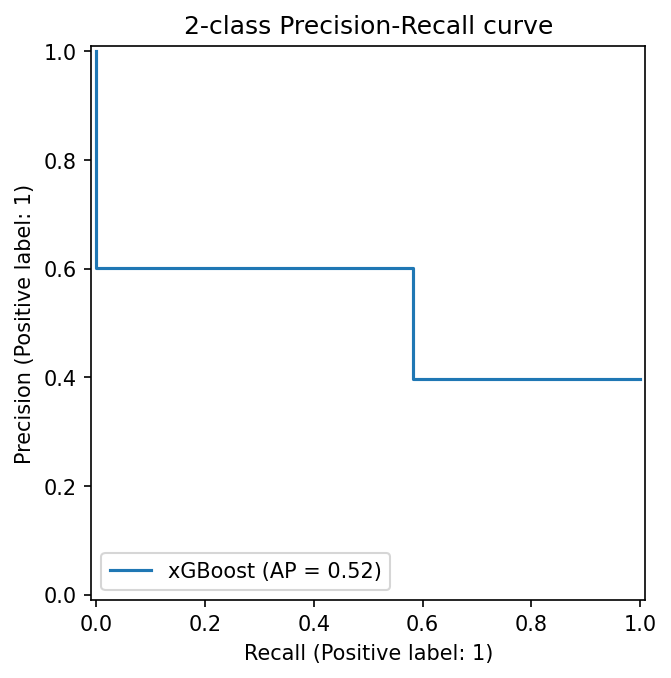

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_model, df_train[features], df_train['FLAG_OWN_CAR'], name="xGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")

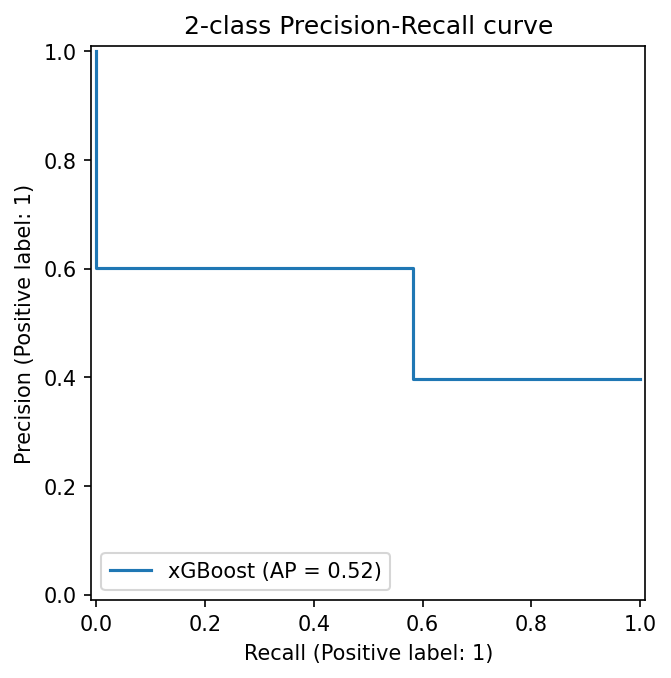

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_model, df_train[features], df_train['FLAG_OWN_CAR'], name="xGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")

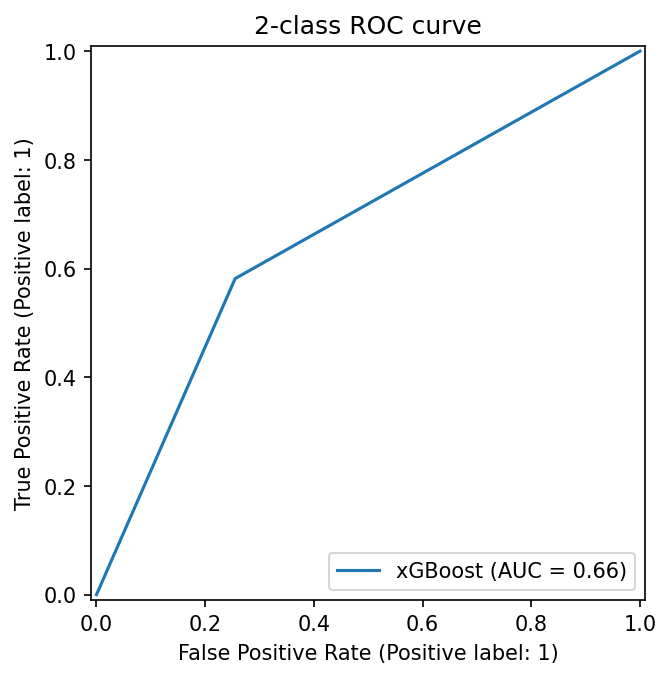

In [34]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_estimator(
    best_model, df_train[features], df_train['FLAG_OWN_CAR'], name="xGBoost")
_ = display.ax_.set_title("2-class ROC curve")

In [39]:
best_model.get_booster().get_score(importance_type='gain')

{'LAT_mean': 4.38847017288208,
 'LON_mean': 5.330265998840332,
 'AVGDV_max': 1.5012129545211792,
 'LLDV_max': 1.4860434532165527,
 'MXDV_max': 1.9206308126449585,
 'Month': 9.31014347076416}